States: 16
Actions: 4


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episod 0: Total reward = 0.0
Episod 1: Total reward = 0.0
Episod 2: Total reward = 0.0
Episod 3: Total reward = 0.0
Episod 4: Total reward = 0.0
Episod 5: Total reward = 0.0
Episod 6: Total reward = 0.0
Episod 7: Total reward = 0.0
Episod 8: Total reward = 0.0
Episod 9: Total reward = 0.0
Episod 10: Total reward = 0.0
Episod 11: Total reward = 0.0
Episod 12: Total reward = 0.0
Episod 13: Total reward = 1.0
Episod 14: Total reward = 1.0
Episod 15: Total reward = 1.0
Episod 16: Total reward = 1.0
Episod 17: Total reward = 1.0
Episod 18: Total reward = 1.0
Episod 19: Total reward = 1.0
Episod 20: Total reward = 1.0
Episod 21: Total reward = 1.0
Episod 22: Total reward = 1.0
Episod 23: Total reward = 1.0
Episod 24: Total reward = 1.0
Episod 25: Total reward = 1.0
Episod 26: Total reward = 1.0
Episod 27: Total reward = 1.0
Episod 28: Total reward = 1.0
Episod 29: Total reward = 1.0
Episod 30: Total reward = 1.0
Episod 31: Total reward = 1.0
Episod 32: Total reward = 1.0
Episod 33: Total rew

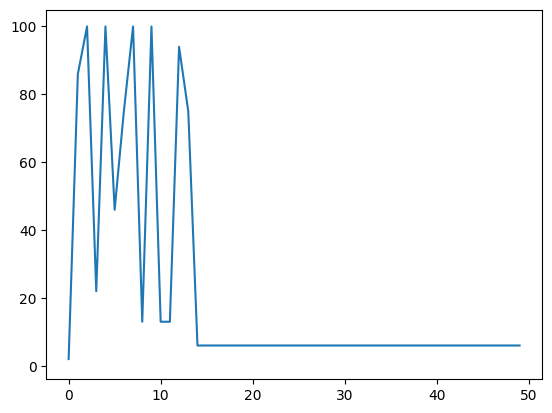

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
 
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='human')
 
NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n
 
print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))
 
lr     = 0.8       # learning rate
gamma  = 0.95      # параметр дисконтирования

NUM_EPISODES    = 50   # число эпизодов для обучения
MAX_STEPS       = 100  # максимальное число шагов в эпизоде 

pathLenList = []     # длины траекторий по эпизодам
totalRewardList = [] # суммарные награды по эпизодам

# Инициализация Q-функции (таблицы)
Q = np.random.rand(NUM_STATES, NUM_ACTIONS)

for i in range(NUM_EPISODES):

    observation = env.reset()[0]
    
    totalReward = 0
    step        = 0
    
    while step < MAX_STEPS:
        step += 1
        
        # Выбор действия по текущей политике
        a = np.argmax(Q[observation,:])
        
        # Сделать шаг
        ob_1, reward, terminated, truncated, info = env.step(a)
        
        # Новое целевое значение функции
        if terminated:
            Q_target = reward
        else:
            Q_target = reward + gamma * np.max(Q[ob_1, :])
            
        # Обновление Q-функции
        Q[observation, a] = (1 - lr) * Q[observation, a] + lr * Q_target
        
        totalReward += reward
        observation = ob_1
        
        #Если конец эпизода
        if terminated or truncated:
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    print('Episod {}: Total reward = {}'.format(i, totalReward))

#Отобразим длины траекторий    
plt.plot(pathLenList)
plt.grid()

# Отобразим график суммарных наград
plt.plot(totalReward)
plt.grid()

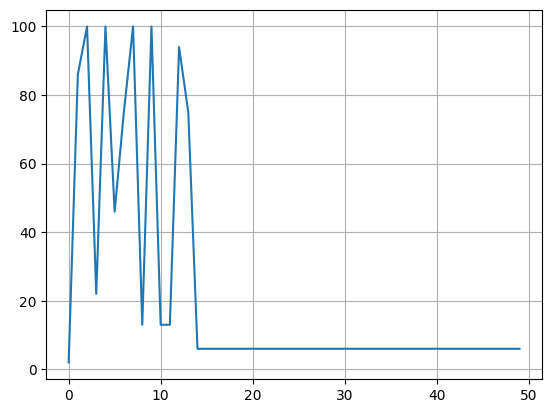

In [2]:
plt.plot(pathLenList)
plt.grid()

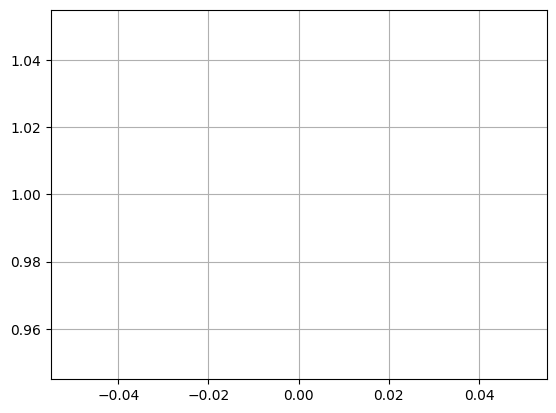

In [3]:
plt.plot(totalReward)
plt.grid()